In [13]:
from skimage.io import imread, imsave,imshow
import skimage
import itertools
import numpy as np

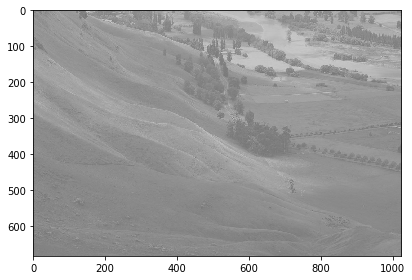

In [14]:
image = imread('img3-4.png')
imshow(image)

In [15]:
def count_pixels_num(img):
    return img.shape[0] * img.shape[1]

In [16]:
def make_histogram(img):
    h = np.zeros(256, np.uint32) 
    for value in img.flatten():
        h[value] += 1
    return np.array(h)

In [17]:
def make_cdf(h):
    cdf = np.zeros(256, np.uint32)
    for value in range(256):
        cdf = list(itertools.accumulate(h))
    return np.array(cdf)

In [18]:
def compute_cdf_min(cdf):
    values = sorted(list(set(cdf))) 
    for value in values:
        if values[0] == 0:
            min_cdf = values[1]
        else:
            min_cdf = values[0]
    return min_cdf

In [19]:
def align_histogram(img, min_cdf, pixels_num, output_name):
    aligned = img.copy()
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            pixel = img[x][y]
            aligned[x][y] = round(255 * (cdf[pixel] - min_cdf) / (pixels_num - 1))
    imsave('{}'.format(output_name), aligned)
    return aligned

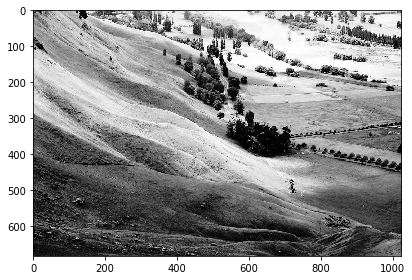

In [20]:

pixels_num = count_pixels_num(image)
hist = make_histogram(image)
cdf = make_cdf(hist)
min_cdf = compute_cdf_min(cdf)
aligned_image = align_histogram(image, min_cdf, pixels_num, 'out_img.png')
imshow(aligned_image)